The following notebook was runned in a docker container with the following commands:

```
docker run -it -p 8888:8888 -p 6006:6006 -v `pwd`:/space/ -w /space/ --rm --name md waleedka/modern-deep-learning jupyter notebook --ip=0.0.0.0 --allow-root
```

The following code is adapted from http://scikit-learn.org/stable/user_guide.html

# Argmax and Argmin

$$ \underset{x \in D}{\operatorname{arg\,max}} f(x) := \{ x \mid \forall y \in D : f(y) \le f(x)\} $$

$$ \underset{x \in D}{\operatorname{arg\,min}} \, f(x) := \{x \mid \forall y \in D : f(y) \ge f(x)\} $$

See [Argmax and Max Calculus](https://www.cs.ubc.ca/~schmidtm/Documents/2016_540_Argmax.pdf)

# Supervised learning

## Generalized Linear Models

### Ordinary Least Squares

$$ \underset{w}{min\,} {|| X w - y||_2}^2 $$

where $$ w = (w_1, ..., w_p) $$

If $ X $ is a matrix of size $ (n, p) $ this method has a
cost of $ O(n p^2) $, assuming that $ n \geq p $.

### Ridge Regression

$$ \underset{w}{min\,} {{|| X w - y||_2}^2 + \alpha {||w||_2}^2} $$

where 

$$ \alpha \gt 0 $$

$$ ||w||_2 = ? $$

### Lasso

$$ \underset{w}{min\,} { \frac{1}{2n_{samples}} ||X w - y||_2 ^ 2 + \alpha ||w||_1} $$

where

$$ ||w||_1 = ? $$

### Elastic Net

$$ \underset{w}{min\,} { \frac{1}{2n_{samples}} ||X w - y||_2 ^ 2 + \alpha \rho ||w||_1 +
    \frac{\alpha(1-\rho)}{2} ||w||_2 ^ 2} $$
    
where $ \rho $ is to control the convex combination of L1 and L2, a.k.a ``l1_ratio``

### Least Angle Regression (LARS)

Least-angle regression (LARS) is a regression algorithm for
high-dimensional data. LARS is similar to forward stepwise
regression. At each step, it finds the predictor most correlated with the
response. When there are multiple predictors having equal correlation, instead
of continuing along the same predictor, it proceeds in a direction equiangular
between the predictors.



In [1]:
from sklearn import linear_model

In [2]:
reg = linear_model.LinearRegression()

In [3]:
reg.fit ([[0, 0], [1, 1], [2, 2]], [0, 1, 2])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [4]:
reg.coef_

array([ 0.5,  0.5])

In [5]:
# based on http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py
# but added Ridge and Lasso
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import math

def fit_and_plot(data_X, data_y, test_ratio=0.0):
    
    if test_ratio == 0:
        data_X_train = data_X
        data_X_test = data_X
        data_y_train = data_y
        data_y_test = data_y
    else:
        print(data_X.shape)
        sample_size, _ = data_X.shape
        test_set_size = math.floor(sample_size * test_ratio)
        
        # Split the data into training/testing sets
        data_X_train = data_X[:-test_set_size]
        data_X_test = data_X[-test_set_size:]

        # Split the targets into training/testing sets
        data_y_train = data_y[:-test_set_size]
        data_y_test = data_y[-test_set_size:]
    
    # Create linear regression object
    lr = linear_model.LinearRegression()
    rg = linear_model.RidgeCV(alphas = [.1, .3, .5, .7, .9])
    ls = linear_model.LassoCV(alphas = [.1, .3, .5, .7, .9])
    en = linear_model.ElasticNetCV(alphas = [.1, .3, .5, .7, .9], l1_ratio = [.1, .3, .5, .7, .9, .99, .997])
    la = linear_model.LarsCV()

    # Train the model using the training sets
    lr.fit(data_X_train, data_y_train)
    rg.fit(data_X_train, data_y_train)
    ls.fit(data_X_train, data_y_train)
    en.fit(data_X_train, data_y_train)
    la.fit(data_X_train, data_y_train)

    # Make predictions using the testing set
    data_y_pred_lr = lr.predict(data_X_test)
    data_y_pred_rg = rg.predict(data_X_test)
    data_y_pred_ls = ls.predict(data_X_test)
    data_y_pred_en = en.predict(data_X_test)
    data_y_pred_la = la.predict(data_X_test)


    # The coefficients
    print('Coefficients: \n', lr.coef_, rg.coef_, ls.coef_, en.coef_, la.coef_)

    print('Super parameters: \n', (), (rg.alpha_,), (ls.alpha_,), (en.alpha_, en.l1_ratio_), (la.alpha_,))
    # The mean squared error
    print("Mean squared error: \n %.2f %.2f %.2f %.2f %.2f"
          % (mean_squared_error(data_y_test, data_y_pred_lr),
             mean_squared_error(data_y_test, data_y_pred_rg),
             mean_squared_error(data_y_test, data_y_pred_ls),
             mean_squared_error(data_y_test, data_y_pred_en),
             mean_squared_error(data_y_test, data_y_pred_la)
            ))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: \n %.2f %.2f %.2f %.2f %.2f' % 
          (r2_score(data_y_test, data_y_pred_lr),
           r2_score(data_y_test, data_y_pred_rg),
           r2_score(data_y_test, data_y_pred_ls),
           r2_score(data_y_test, data_y_pred_en),
           r2_score(data_y_test, data_y_pred_la)
          ))

    # Plot outputs
    plt.rcParams["figure.figsize"] = [15.0, 10.0]
    plt.scatter(data_X_test, data_y_test,  color='black')
    # blue
    plot_lr, = plt.plot(data_X_test, data_y_pred_lr, color='#4572a7', label='LinearRegression', linewidth=3, linestyle='solid')
    # green
    plot_rg, = plt.plot(data_X_test, data_y_pred_rg, color='#1a9850', label='RidgeCV', linewidth=1, linestyle='solid')
    # orange
    plot_ls, = plt.plot(data_X_test, data_y_pred_ls, color='#ff7f0e', label='LassoCV', linewidth=1, linestyle='solid')
    # red
    plot_en, = plt.plot(data_X_test, data_y_pred_en, color='#aa4643', label='ElasticNetCV', linewidth=1, linestyle='solid')
    # purple
    plot_la, = plt.plot(data_X_test, data_y_pred_la, color='#886fa8', label='LarsCV', linewidth=1, linestyle='solid')
    
    plt.legend(handles=[plot_lr, plot_rg, plot_ls, plot_en, plot_la])

    plt.xticks(())
    plt.yticks(())

    plt.show()

All features are ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Using bmi
(442, 10)
(442, 1)
(442,)
(442, 1)
Coefficients: 
 [ 976.05247196] [ 848.21749059] [ 929.33232687] [ 815.21201628] [ 976.05247196]
Super parameters: 
 () (0.10000000000000001,) (0.10000000000000001,) (0.10000000000000001, 0.997) (0.0,)
Mean squared error: 
 3700.73 3692.15 3687.88 3703.55 3700.73
Variance score: 
 0.35 0.35 0.35 0.35 0.35


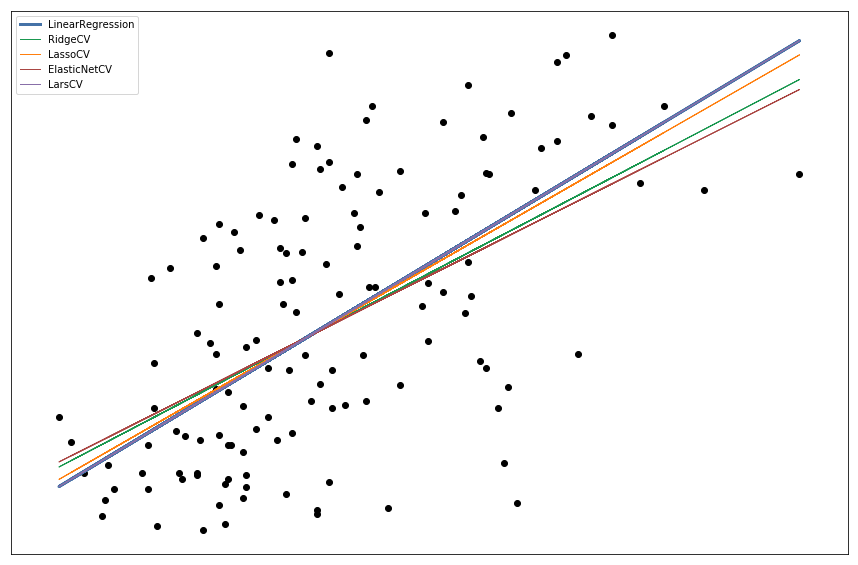

In [23]:
from sklearn import datasets

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

print("All features are %s" % diabetes.feature_names)

FEATURE_TO_USE = 2

print("Using %s" % diabetes.feature_names[FEATURE_TO_USE])

print(diabetes.data.shape)

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, FEATURE_TO_USE]
diabetes_y = diabetes.target

print(diabetes_X.data.shape)
print(diabetes_y.data.shape)

fit_and_plot(diabetes_X, diabetes_y, test_ratio=0.3)

(500, 1)
Coefficients: 
 [ 4.95914867] [ 4.9452915] [ 4.85017838] [ 4.72829632] [ 4.95914867]
Super parameters: 
 () (0.90000000000000002,) (0.10000000000000001,) (0.10000000000000001, 0.69999999999999996) (0.0,)
Mean squared error: 
 86.38 86.41 86.65 86.99 86.38
Variance score: 
 0.31 0.31 0.31 0.31 0.31


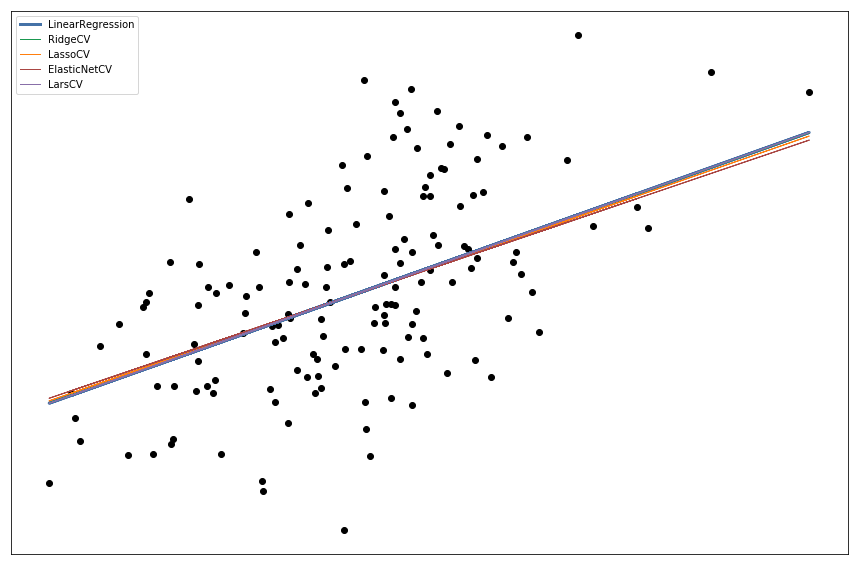

In [7]:
SAMPLE_SIZE = 500

t_dis = np.random.standard_t(100, size=[2, SAMPLE_SIZE])
t_dis = np.random.normal(0, 1, size=[2, SAMPLE_SIZE])
t_dis


t_dis[1] = t_dis[0] * 5 + t_dis[1] * 10

data_X = t_dis[0].reshape(-1, 1)
data_y = t_dis[1]

fit_and_plot(data_X, data_y, test_ratio=0.3)

(500, 1)
Coefficients: 
 [ 91.1815655] [ 91.10651964] [ 91.08546535] [ 91.05950116] [ 91.1815655]
Super parameters: 
 () (0.29999999999999999,) (0.10000000000000001,) (0.10000000000000001, 0.997) (0.0,)
Mean squared error: 
 1121.42 1121.08 1120.98 1120.87 1121.42
Variance score: 
 0.83 0.83 0.83 0.83 0.83


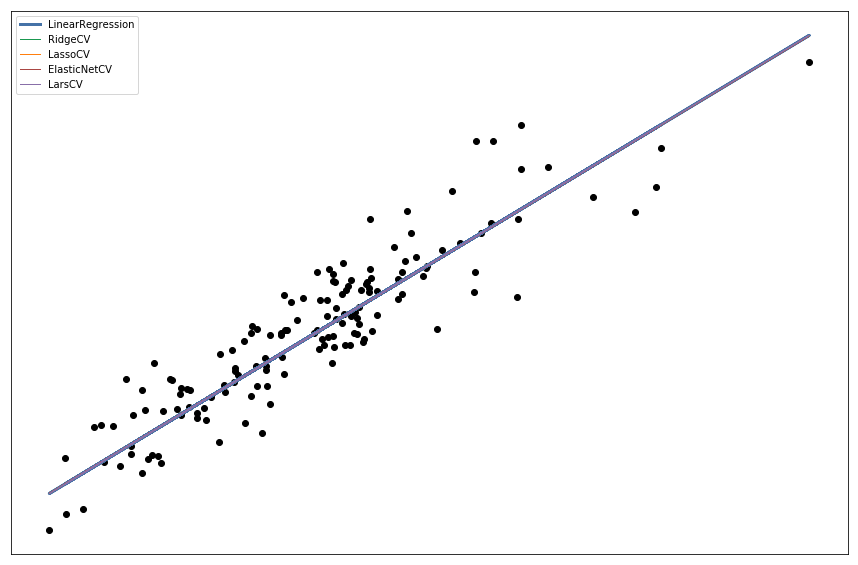

In [33]:
SAMPLE_SIZE = 500

data_X, data_y = datasets.make_regression(n_samples=SAMPLE_SIZE, n_features=1, n_informative=1, 
                                 n_targets=1, bias=15.0, effective_rank=None, 
                                 tail_strength=0.5, noise=30.0, shuffle=True, 
                                 coef=False, random_state=None)
fit_and_plot(data_X, data_y, test_ratio=0.3)

Coefficients: 
 [ 0.50009091] [ 0.49603246] [ 0.49009091] [ 0.49463916] [ 0.50009091]
Super parameters: 
 () (0.90000000000000002,) (0.10000000000000001,) (0.10000000000000001, 0.10000000000000001) (0.0,)
Mean squared error: 
 1.25 1.25 1.25 1.25 1.25
Variance score: 
 0.67 0.67 0.67 0.67 0.67


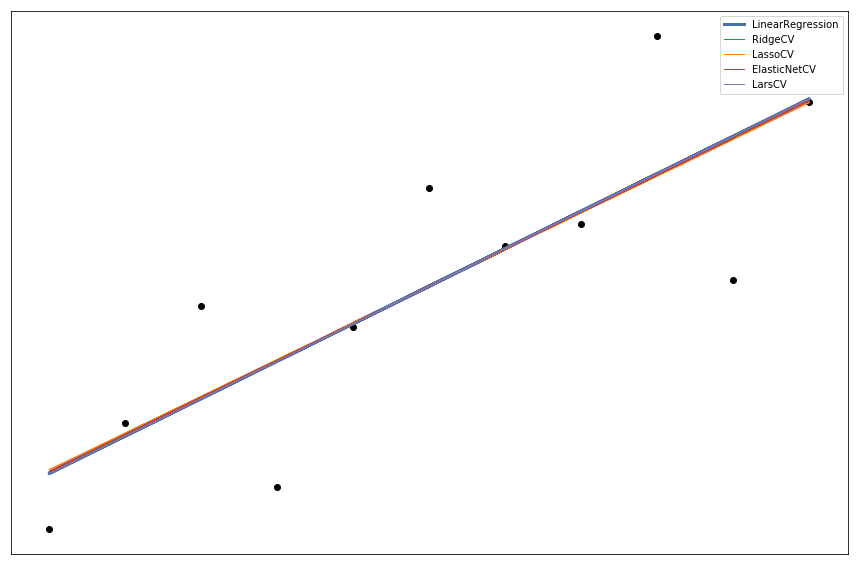

Coefficients: 
 [ 0.5] [ 0.49594229] [ 0.49] [ 0.49454906] [ 0.5]
Super parameters: 
 () (0.90000000000000002,) (0.10000000000000001,) (0.10000000000000001, 0.10000000000000001) (0.0,)
Mean squared error: 
 1.25 1.25 1.25 1.25 1.25
Variance score: 
 0.67 0.67 0.67 0.67 0.67


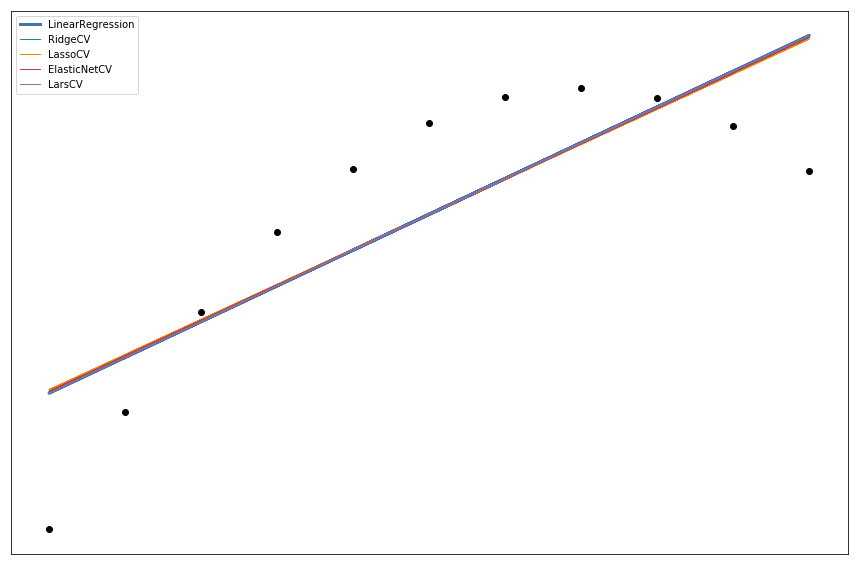

Coefficients: 
 [ 0.49972727] [ 0.49567178] [ 0.40972727] [ 0.45395677] [ 0.49972727]
Super parameters: 
 () (0.90000000000000002,) (0.90000000000000002,) (0.90000000000000002, 0.10000000000000001) (0.0,)
Mean squared error: 
 1.25 1.25 1.33 1.27 1.25
Variance score: 
 0.67 0.67 0.64 0.66 0.67


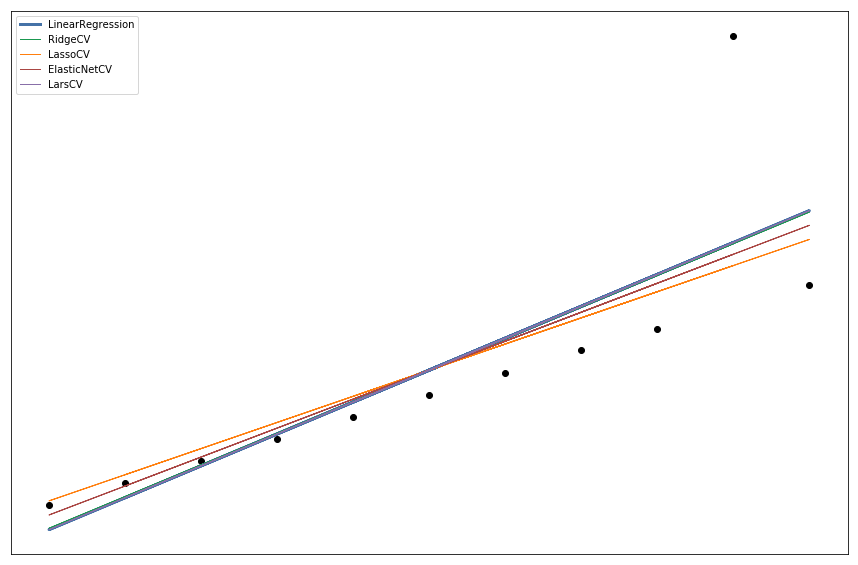

Coefficients: 
 [ 0.49990909] [ 0.49585212] [ 0.46990909] [ 0.46369623] [ 0.49990909]
Super parameters: 
 () (0.90000000000000002,) (0.29999999999999999,) (0.69999999999999996, 0.10000000000000001) (0.0,)
Mean squared error: 
 1.25 1.25 1.26 1.26 1.25
Variance score: 
 0.67 0.67 0.66 0.66 0.67


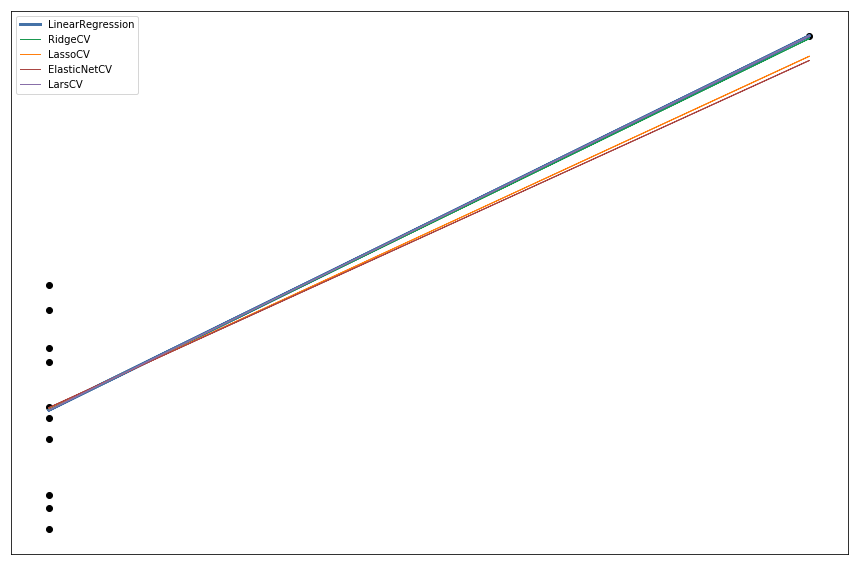

In [8]:
# The data is from https://gist.github.com/endolith/3299951 , might change to use
# the dataset in sns instead: https://seaborn.pydata.org/examples/anscombes_quartet.html
x1 = np.array([10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]).reshape(-1, 1)
y1 = np.array([8.04, 6.95, 7.58,  8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

x2 = np.array([10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]).reshape(-1, 1)
y2 = np.array([9.14, 8.14, 8.74,  8.77, 9.26, 8.10, 6.13, 3.10, 9.13,  7.26, 4.74])

x3 = np.array([10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]).reshape(-1, 1)
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15,  6.42, 5.73])

x4 = np.array([8.0,  8.0,  8.0,   8.0,  8.0,  8.0,  8.0,  19.0,  8.0,  8.0,  8.0]).reshape(-1, 1)
y4 = np.array([6.58, 5.76, 7.71,  8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])

fit_and_plot(x1, y1)
fit_and_plot(x2, y2)
fit_and_plot(x3, y3)
fit_and_plot(x4, y4)

L1-norm:

$$ \left\| \boldsymbol{x} \right\| _1 := \sum_{i=1}^{n} \left| x_i \right| $$

In [53]:
# Adapted from http://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_lars.html#sphx-glr-auto-examples-linear-model-plot-lasso-lars-py
# Author: Fabian Pedregosa <fabian.pedregosa@inria.fr>
#         Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import linear_model
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

df = pd.DataFrame(X, index=y, columns=diabetes.feature_names)
display(df.head())
display(df.describe())

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
151.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
75.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
141.0,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
206.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
135.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [78]:
print("Computing regularization path using the LARS ...")
alphas, _, coefs = linear_model.lars_path(X, y, method='lasso', verbose=True)

df = pd.DataFrame(coefs)
display(df)
display(df.describe())

# xx are the L1-norms
xx = np.sum(np.abs(coefs.T), axis=1)

# the last of xx is the maximum of L1-norms
normalized_xx = xx / xx[-1]

df = pd.DataFrame(np.array([xx, normalized_xx]), index=["|coef|", "max(|coef|)"])
display(df)

df = pd.DataFrame(alphas.reshape(1, -1), index=["Alphas"])
display(df)

Computing regularization path using the LARS ...
.

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.718948,-7.011245,-10.012198
1,0.0,0.00000,0.000000,0.000000,0.000000,-74.916514,-111.978554,-197.756501,-226.133662,-227.175798,-234.397622,-237.100786,-239.819089
2,0.0,60.11927,361.894612,434.757960,505.659558,511.348071,512.044089,522.264847,526.885467,526.390594,522.648786,521.075130,519.839787
3,0.0,0.00000,0.000000,79.236447,191.269884,234.154616,252.527017,297.159737,314.389272,314.950467,320.342554,321.549027,324.390428
4,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-103.946249,-195.105830,-237.340973,-554.266328,-580.438600,-792.184162
5,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.628274,286.736168,313.862132,476.745838
6,0.0,0.00000,0.000000,0.000000,-114.100980,-169.711394,-196.045443,-223.926033,-152.477259,-134.599352,0.000000,0.000000,101.044570
7,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,106.342806,111.384129,148.900445,139.857868,177.064176
8,0.0,0.00000,301.775343,374.915837,439.664942,450.667448,452.392728,514.749481,529.916031,545.482597,663.033287,674.936617,751.279321
9,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,12.078152,54.767681,64.487418,64.606670,66.330955,67.179400,67.625386


,0,1,2,3,4,5,6,7,8,9,10,11,12
count,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.0,6.011927,66.366996,88.891024,102.249340,95.154223,92.101799,86.331296,96.830424,99.732661,121.360930,121.390954,137.597406
std,0.0,19.011382,140.629650,168.930834,209.244879,226.881654,234.972742,269.681995,277.171838,282.475949,355.759653,364.973745,435.780706
min,0.0,0.000000,0.000000,0.000000,-114.100980,-169.711394,-196.045443,-223.926033,-226.133662,-237.340973,-554.266328,-580.438600,-792.184162
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-77.959687,-114.357945,-100.949514,-4.289211,-5.258434,9.397198
50%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.243709,49.117472,107.615700,103.518634,139.054373
75%,0.0,0.000000,0.000000,59.427335,143.452413,175.615962,192.414800,236.561723,262.377655,264.058883,311.940958,319.627303,438.656985
max,0.0,60.119270,361.894612,434.757960,505.659558,511.348071,512.044089,522.264847,529.916031,545.482597,663.033287,674.936617,751.279321


,0,1,2,3,4,5,6,7,8,9,10,11,12
|coef|,0.0,60.119270,663.669955,888.910243,1250.695364,1440.798043,1537.065983,1914.570529,2115.737744,2195.558855,2802.375093,2863.010804,3460.004955
max(|coef|),0.0,0.017375,0.191812,0.256910,0.361472,0.416415,0.444238,0.553343,0.611484,0.634554,0.809934,0.827459,1.000000


,0,1,2,3,4,5,6,7,8,9,10,11,12
Alphas,2.148044,2.012027,1.024663,0.7151,0.294414,0.200865,0.15603,0.045206,0.012392,0.011514,0.004937,0.002965,0.0


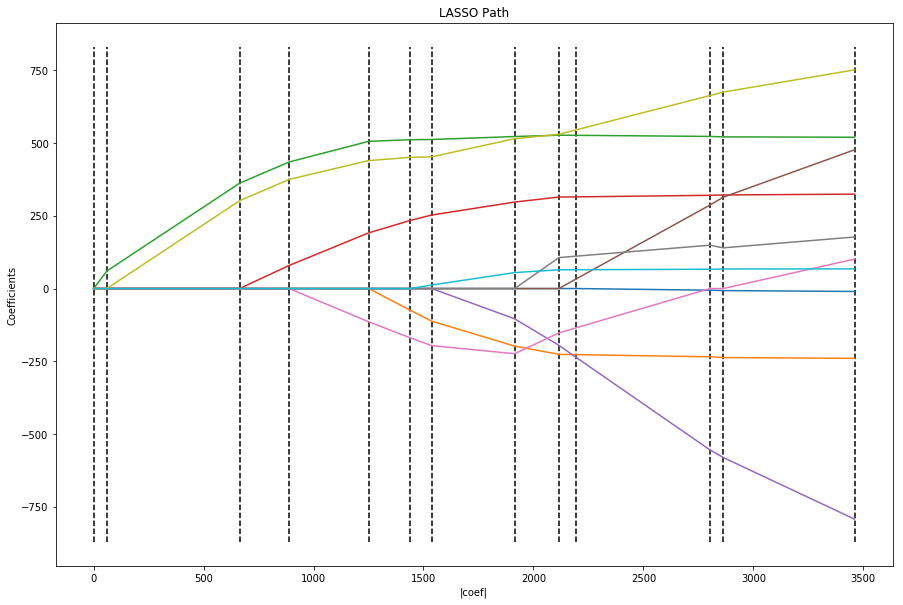

In [79]:
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()